In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

path = 'C:/Windows/Fonts/malgun.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

# 대구 아파트 데이터

## 1-1
계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

데이터 출처 : https://www.data.go.kr/data/15094266/fileData.do 후처리

데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv

데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

In [2]:
import pandas as pd
apt = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv',encoding='euckr')
apt.head(5).T

,0,1,2,3,4
순번,1,1,1,1,1
계약구분,유효,유효,유효,유효,유효
재계약횟수,10,10,10,10,10
거주개월,222,222,222,222,222
아파트 이름,강남아파트,강남아파트,강남아파트,강남아파트,강남아파트
아파트 ID,5,5,5,5,5
아파트 평점,7.0,7.0,7.0,7.0,7.0
호실고유번호,14520,14520,14520,14520,14520
층,1,1,1,1,1
평형대,12,12,12,12,12


## 1.2
EDA 및 결측치 처리 (시각화 포함)

In [3]:
apt.isna().sum()/len(apt)

순번         0.000000
계약구분       0.005846
재계약횟수      0.000000
거주개월       0.000000
아파트 이름     0.000000
아파트 ID     0.000000
아파트 평점     0.014096
호실고유번호     0.000000
층          0.000000
평형대        0.000000
계약자고유번호    0.000000
계약서고유번호    0.000000
입주연도       0.000000
퇴거연도       0.703558
거주연도       0.000000
월세(원)      0.000000
보증금(원)     0.000000
대표나이       0.000000
나이         0.000000
성별         0.000000
결혼여부       0.000000
거주자 수      0.000000
퇴거여부       0.000000
dtype: float64

In [4]:
apt['퇴거연도'].unique()

array([  nan, 2012., 2019., 2011., 2017., 2014., 2016., 2020., 2010.,
       2018., 2009., 2015., 2008., 2013.])

In [5]:
apt['거주연도'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [6]:
apt[apt['퇴거연도'].isna()]['퇴거여부'].unique()

array(['미퇴거'], dtype=object)

- 미퇴거인 경우, 퇴거년도가 없으므로 영향을 덜주도록 중앙값으로 대체하거나, 결측치로 둔다

In [7]:
# 중앙값대체
apt['퇴거연도'] = apt['퇴거연도'].fillna(apt['퇴거연도'].median())

<Axes: xlabel='계약구분'>

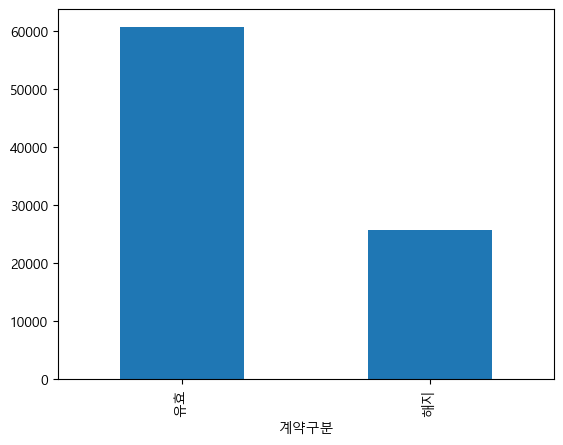

In [8]:
apt['계약구분'].value_counts().plot(kind='bar')

In [9]:
apt[apt['계약구분'].isna()]

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
393,51,NaN,8,195,강남아파트,5,7.0,15526,4,12,...,2017.0,2015,45900,2538000,64,58,남,미혼,1,미퇴거
449,62,NaN,6,156,강남아파트,5,7.0,15730,5,15,...,2017.0,2012,48800,2297000,31,22,여,미혼,3,미퇴거
582,78,NaN,8,173,강남아파트,5,7.0,16067,6,15,...,2017.0,2017,124000,8286000,71,67,남,기혼,2,퇴거
827,114,NaN,10,215,강남아파트,5,7.0,16816,9,15,...,2020.0,2014,50300,2366000,69,62,남,미혼,1,미퇴거
1280,188,NaN,4,79,까치아파트,4,10.0,6134,1,15,...,2017.0,2014,45400,2476000,88,81,여,미혼,1,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85650,12712,NaN,10,229,지산5단지아파트,3,8.0,85642,7,19,...,2017.0,2017,187900,12873000,68,64,남,기혼,2,미퇴거
85657,12714,NaN,7,149,지산5단지아파트,3,8.0,85655,7,19,...,2017.0,2011,59800,2771000,49,39,여,미혼,3,미퇴거
85766,12728,NaN,10,219,지산5단지아파트,3,8.0,85761,8,15,...,2017.0,2014,93300,6397000,63,56,남,미혼,2,미퇴거
85917,12750,NaN,10,222,지산5단지아파트,3,NaN,85906,8,12,...,2017.0,2020,42300,1959000,73,72,여,미혼,1,미퇴거


- 계약구분을 유추할 수 있는 변수가 없으며, 결측치가 결과에 영향을 미칠수도 있으므로 제거

In [10]:
# 계약구분의 결측치 제거
apt.dropna(subset=['계약구분'], inplace= True)

<Axes: xlabel='아파트 평점'>

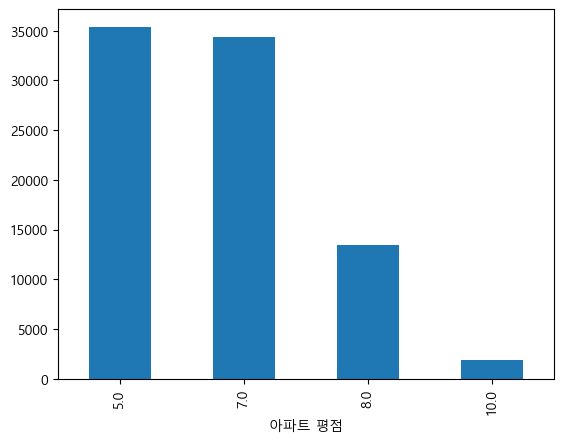

In [11]:
apt['아파트 평점'].value_counts().plot(kind='bar')

In [12]:
apt[apt['아파트 평점'].isna()]

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
65,8,유효,11,271,강남아파트,5,NaN,14649,1,15,...,2017.0,2008,47600,2947000,57,44,여,미혼,3,미퇴거
191,24,유효,3,67,강남아파트,5,NaN,14954,2,12,...,2017.0,2017,38800,2078000,54,50,여,미혼,2,미퇴거
308,37,유효,11,246,강남아파트,5,NaN,15257,3,12,...,2017.0,2019,171120,11774400,48,46,여,미혼,4,미퇴거
376,48,해지,6,124,강남아파트,5,NaN,15502,4,15,...,2016.0,2009,47400,2297000,62,50,여,미혼,2,미퇴거
377,48,해지,6,124,강남아파트,5,NaN,15502,4,15,...,2016.0,2010,47400,2297000,62,51,여,미혼,2,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85683,12718,유효,10,222,지산5단지아파트,3,NaN,85682,7,19,...,2017.0,2010,75300,4574000,78,67,남,기혼,7,미퇴거
85756,12727,유효,9,195,지산5단지아파트,3,NaN,85748,8,15,...,2017.0,2017,48600,2252000,60,56,여,미혼,2,미퇴거
85795,12732,유효,11,246,지산5단지아파트,3,NaN,85786,8,15,...,2017.0,2018,51000,2365000,68,65,남,미혼,1,미퇴거
85796,12732,유효,11,246,지산5단지아파트,3,NaN,85786,8,15,...,2017.0,2019,51000,2365000,68,66,남,미혼,1,미퇴거


- 아파트 평점은 1.4% 수준의 데이터 값을 가지며, 수치형데이터이므로 영향을 적게 받도록 중간값으로 대치한다

In [13]:
# 중앙값대체
apt['아파트 평점'] = apt['아파트 평점'].fillna(apt['아파트 평점'].median())

In [14]:
# 결과 확인
apt.info()
apt.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 86396 entries, 0 to 86903
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순번       86396 non-null  int64  
 1   계약구분     86396 non-null  object 
 2   재계약횟수    86396 non-null  int64  
 3   거주개월     86396 non-null  int64  
 4   아파트 이름   86396 non-null  object 
 5   아파트 ID   86396 non-null  int64  
 6   아파트 평점   86396 non-null  float64
 7   호실고유번호   86396 non-null  int64  
 8   층        86396 non-null  int64  
 9   평형대      86396 non-null  int64  
 10  계약자고유번호  86396 non-null  int64  
 11  계약서고유번호  86396 non-null  int64  
 12  입주연도     86396 non-null  int64  
 13  퇴거연도     86396 non-null  float64
 14  거주연도     86396 non-null  int64  
 15  월세(원)    86396 non-null  int64  
 16  보증금(원)   86396 non-null  int64  
 17  대표나이     86396 non-null  int64  
 18  나이       86396 non-null  int64  
 19  성별       86396 non-null  object 
 20  결혼여부     86396 non-null  object 
 21  거주자 수    86396 no

,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,계약서고유번호,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
count,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,86396.000000,8.639600e+04,86396.000000,86396.000000,86396.000000
mean,6489.988969,7.381580,174.403086,1.830467,6.401928,43437.677798,7.882703,13.290708,43448.372517,43449.208852,2005.240023,2016.701086,2013.988645,57673.339043,3.383964e+06,66.671594,59.660239,1.653097
std,3745.181638,2.759473,64.805294,0.875183,1.277939,25087.744490,4.268012,2.385894,25084.916138,25084.419165,4.833842,1.773543,3.729936,30581.386006,2.380752e+06,12.951874,13.277499,0.927314
min,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1994.000000,2008.000000,2008.000000,31300.000000,1.520000e+06,21.000000,20.000000,1.000000
25%,3240.000000,5.000000,126.000000,1.000000,5.000000,21711.000000,4.000000,12.000000,21721.000000,21731.000000,2002.000000,2017.000000,2011.000000,40300.000000,1.954000e+06,59.000000,51.000000,1.000000
50%,6545.000000,8.000000,197.000000,2.000000,7.000000,43425.000000,8.000000,12.000000,43452.000000,43460.000000,2003.000000,2017.000000,2014.000000,43600.000000,2.144000e+06,66.000000,59.000000,1.000000
75%,9709.000000,10.000000,222.000000,2.000000,7.000000,65154.000000,12.000000,15.000000,65162.000000,65170.000000,2008.000000,2017.000000,2017.000000,62900.000000,3.778000e+06,76.000000,69.000000,2.000000
max,12883.000000,12.000000,323.000000,5.000000,10.000000,86891.000000,15.000000,19.000000,86892.000000,86904.000000,2020.000000,2020.000000,2020.000000,311080.000000,2.078400e+07,121.000000,120.000000,10.000000


In [15]:
# # 범주형/ / 수치형 구분
# cat = apt.select_dtypes(include=['object']).columns
# num = apt.columns.difference(cat)
# rem = ['계약서고유번호','계약자고유번호','아파트 ID','호실고유번호']
# num = apt.columns.difference(rem)
# print(cat)
# print(num)

## 1.3
이상치 처리

In [16]:
# 범주형/ / 수치형 구분
cat = apt.select_dtypes(include=['object']).columns
num = apt.columns.difference(cat)
rem = ['계약서고유번호','계약자고유번호','아파트 ID','호실고유번호']
num = list(set(num)-set(rem))
print(cat)
print(num)

Index(['계약구분', '아파트 이름', '성별', '결혼여부', '퇴거여부'], dtype='object')
['보증금(원)', '대표나이', '순번', '퇴거연도', '거주연도', '나이', '월세(원)', '거주개월', '아파트 평점', '층', '거주자 수', '입주연도', '평형대', '재계약횟수']


In [17]:
num_ = list(set(num)-set(['보증금(원)','월세(원)','순번','퇴거연도','입주연도','거주연도']))

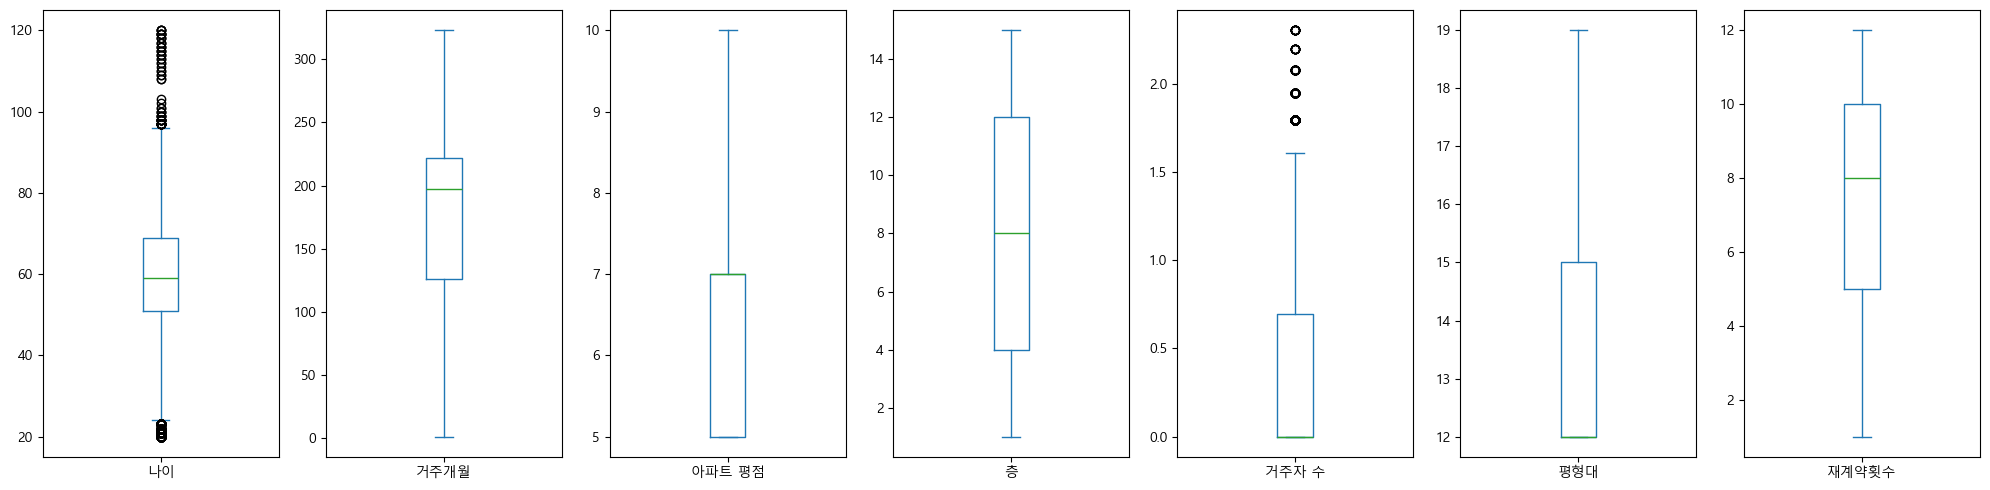

In [54]:
apt[num_].plot(kind='box',figsize = (20,5), subplots=True)
plt.tight_layout();

- 이상치 나타나는 변수를 하나씩 확인

<Axes: >

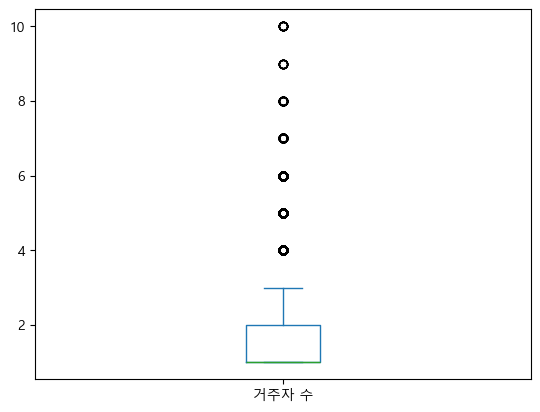

In [19]:
apt['거주자 수'].plot(kind='box')

In [20]:
def iqr(a) :
    iqr = apt[a].quantile(0.75)-apt[a].quantile(0.25)
    return (apt[a]>apt[a].quantile(0.75)+iqr*1.5) | (apt[a]<apt[a].quantile(0.25)-iqr*1.5) 

len(apt[iqr('거주자 수')])/len(apt)

0.04897217463771471

- 이상치 비중은 높지 않으며, 차이 크지 않으므로 log변환

<Axes: >

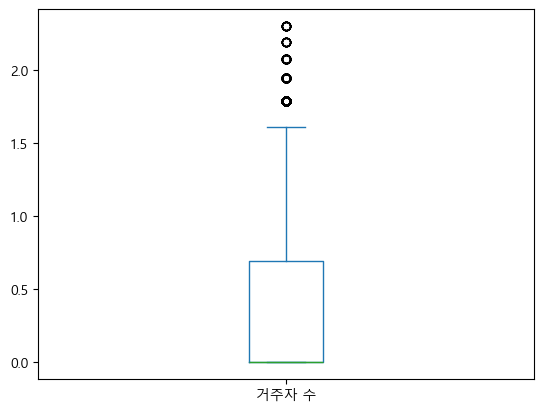

In [21]:
import numpy as np
apt['거주자 수'] = np.log(apt[['거주자 수']])
apt['거주자 수'].plot(kind='box')

<Axes: ylabel='Density'>

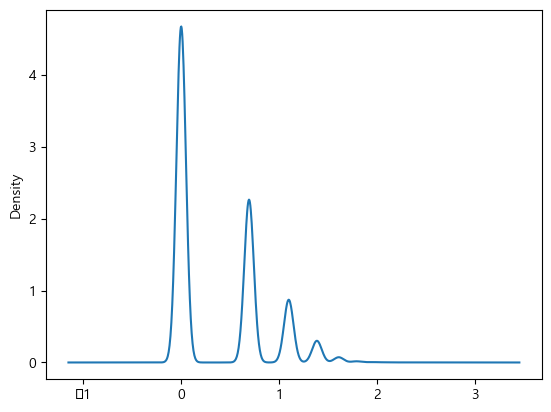

In [22]:
apt['거주자 수'].plot(kind='kde')

In [23]:
len(apt[iqr('거주자 수')])/len(apt)

0.003368211491272744

In [24]:
apt[iqr('거주자 수')]

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
1390,200,유효,9,222,까치아파트,4,10.0,6366,1,15,...,2017.0,2008,56300,4346000,52,39,남,기혼,1.791759,미퇴거
1391,200,유효,9,222,까치아파트,4,10.0,6366,1,15,...,2017.0,2009,70900,5476000,52,40,남,기혼,1.791759,미퇴거
1392,200,유효,9,222,까치아파트,4,10.0,6366,1,15,...,2017.0,2010,70900,5476000,52,41,남,기혼,1.791759,미퇴거
1393,200,유효,9,222,까치아파트,4,10.0,6366,1,15,...,2017.0,2011,60900,4700000,52,42,남,기혼,1.791759,미퇴거
1394,200,유효,9,222,까치아파트,4,10.0,6366,1,15,...,2017.0,2012,60900,4700000,52,43,남,기혼,1.791759,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85838,12739,해지,1,171,지산5단지아파트,3,8.0,85838,8,19,...,2013.0,2009,69800,2440000,68,56,남,기혼,2.197225,미퇴거
85839,12739,해지,1,171,지산5단지아파트,3,8.0,85838,8,19,...,2013.0,2010,69800,2440000,68,57,남,기혼,2.197225,미퇴거
85840,12739,해지,1,171,지산5단지아파트,3,8.0,85838,8,19,...,2013.0,2011,69800,2440000,68,58,남,기혼,2.197225,미퇴거
85841,12739,해지,1,171,지산5단지아파트,3,8.0,85838,8,19,...,2013.0,2012,69800,2440000,68,59,남,기혼,2.197225,미퇴거


In [25]:
apt[num_].corr()

,대표나이,나이,아파트 평점,거주개월,층,거주자 수,평형대,재계약횟수
대표나이,1.000000,0.959858,0.027944,0.197614,-0.053765,-0.163939,-0.030917,0.213330
나이,0.959858,1.000000,0.027550,0.161790,-0.052242,-0.177822,-0.029988,0.182826
아파트 평점,0.027944,0.027550,1.000000,0.034851,-0.014496,0.047960,0.135552,0.093389
거주개월,0.197614,0.161790,0.034851,1.000000,0.010481,-0.053190,0.056279,0.942387
층,-0.053765,-0.052242,-0.014496,0.010481,1.000000,0.011528,-0.003984,0.003709
거주자 수,-0.163939,-0.177822,0.047960,-0.053190,0.011528,1.000000,0.295211,-0.084023
평형대,-0.030917,-0.029988,0.135552,0.056279,-0.003984,0.295211,1.000000,0.058962
재계약횟수,0.213330,0.182826,0.093389,0.942387,0.003709,-0.084023,0.058962,1.000000


- 다중공선성을 일으킬 수 있으므로 나이와 대표나이 중 하나를 제거하는게 낫다.
    - 나이가 대표나이보다 더 많은 수치를 보이므로 대표나이를 제거

In [26]:
num_ = list(set(num_)-set(['대표나이']))

<Axes: >

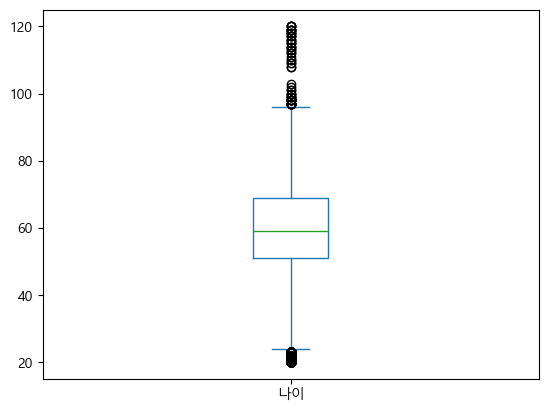

In [27]:
apt['나이'].plot(kind='box')

In [28]:
len(apt[iqr('나이')])/len(apt)

0.006331311634797907

<Axes: >

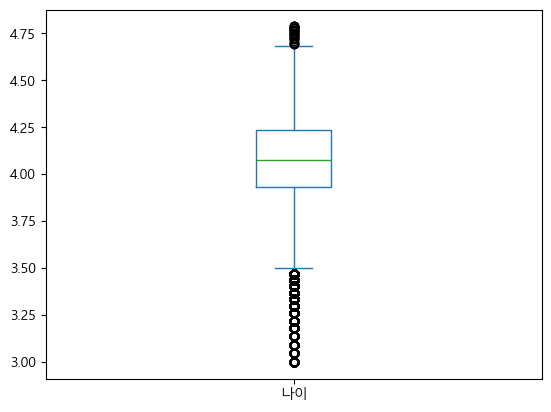

In [29]:
apt['나이'] = np.log(apt[['나이']])
apt['나이'].plot(kind='box')

In [30]:
len(apt[iqr('나이')])/len(apt)

0.028230473633038565

- log변환으로는 처리가 되지 않으므로 역치환 후 

In [31]:
apt['나이'] = np.exp(apt[['나이']])


In [32]:
apt['나이'].quantile(0.25)

51.0

<Axes: >

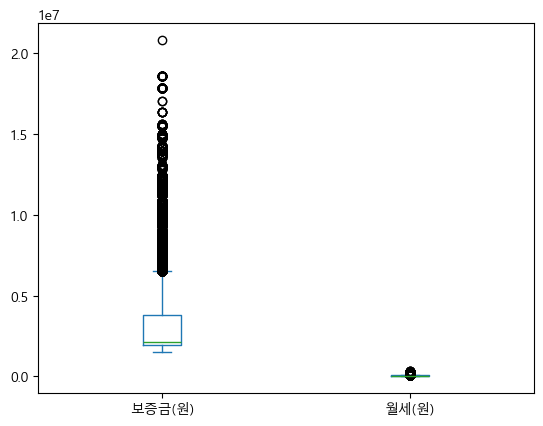

In [33]:
apt[['보증금(원)','월세(원)']].plot(kind='box')

## 2-1

재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 ‘높음’, 작으면 ‘낮음’ 으로 재계약 횟수 이분 변수를 구성하시오.

## 2-2

차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

## 3-1

재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

## 3-2

재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 재계약횟수 이분변수를 종속변수로 하는 분류 분석을 두가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.

## 3-3

최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오

## 3-4

해당 데이터 분석결과로 얻을 수 있는 점 제시

# 야구데이터

## 4-1

각 회차별로 1번 타자의 출루 (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)

데이터 출처 : https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018 데이터를 후처리

데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv

데이터 설명 :

A 야구구단의 시합 결과중 일부를 나타낸다.
각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다.
각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 ‘수치 의미’ 열을 통해 확인 할 수 있다.

In [34]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   game_id  200 non-null    int64 
 1   a1_1     200 non-null    object
 2   a1_2     200 non-null    int64 
 3   a2_1     200 non-null    object
 4   a2_2     200 non-null    int64 
 5   a3_1     200 non-null    int64 
 6   a3_2     200 non-null    int64 
 7   a4_1     200 non-null    object
 8   a4_2     200 non-null    int64 
 9   a5_1     200 non-null    int64 
 10  a5_2     200 non-null    int64 
 11  a6_1     200 non-null    int64 
 12  a6_2     200 non-null    int64 
 13  a7_1     200 non-null    object
 14  a7_2     200 non-null    int64 
 15  a8_1     200 non-null    int64 
 16  a8_2     200 non-null    int64 
 17  a9_1     200 non-null    int64 
 18  a9_2     200 non-null    int64 
 19  b1       200 non-null    int64 
 20  b2       200 non-null    int64 
 21  b3       200 non-null    int64 
 22  b4

In [35]:
hitter = pd.DataFrame(df.iloc[:,1:19].values.reshape(-1,2),columns = ['seq_1','seq_2'])
score = pd.DataFrame(df.iloc[:,19:].values.reshape(-1,1),columns = ['score'])
ining = pd.DataFrame([i for i in range(1,10)]*200,columns=['ining'])
df  = pd.concat([ining, hitter, score],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ining   1800 non-null   int64 
 1   seq_1   1800 non-null   object
 2   seq_2   1800 non-null   object
 3   score   1800 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 56.4+ KB


In [36]:
print(df['seq_1'].unique(),df['seq_2'].unique())

['5' 5 7 1 '6' 2 '1' 6 4 '2' '7' '4' 8 3 '"' ' ' '8' '&' '3' ' :'] [5 1 4 6 7 9 2 8 3]


In [37]:
dic = {'5':5, 5:5, 7:7, 1:1, '6':6, 2:2, '1':1, 6:6, 4:4, '2':2, '7':7, '4':4, 8:8, 3:3, '"':0, ' ':0, '8':8, '&':8, '3':3, ' :':0}
df['seq_1'] = df['seq_1'].map(dic)

- 첫번째, 두번째 타자가 홈런친경우 제외
- 1번타자의 출루 시 (1,2,3루타와 사사구) 있는 경우의 득점여부

In [38]:
X = [1,2,3,6,8]
res = df[(df['seq_1'] !=4) & (df['seq_1'] !=4)]# 홈런제외
res = res[res['seq_1'].isin(X)]

In [39]:
res['seq_1'] = res['seq_1'].astype(str)
res['seq_2'] = res['seq_2'].astype(str)

## 4-2

4-1 데이터에 대해 Logistic Regression을 적용하고 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 하라

In [40]:
import statsmodels.formula.api as smf

res['score'] = res['score'].apply(lambda x : 1 if x>=1 else 0)
formula= 'score~'+'+'.join(res.columns.difference(['score']))
model = smf.logit(formula,data=res).fit(method='bfgs')
model.summary()

         Current function value: 0.571838
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


E:\miniconda\envs\tw311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  score   No. Observations:                  567
Model:                          Logit   Df Residuals:                      553
Method:                           MLE   Df Model:                           13
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.1556
Time:                        14:47:05   Log-Likelihood:                -324.23
converged:                      False   LL-Null:                       -383.97
Covariance Type:            nonrobust   LLR p-value:                 2.555e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4710      0.365      4.031      0.000       0.756       2.186
seq_1[T.2]     0.3252      0.248      1.312      0.190      -0.161       0.811
seq_1[T.3]     1.1628      0.985      1.181      0.238      -0.767       3.093
seq_1[T.6]     0.0062      0.230      0.027      0.978      -0.444       0.457
seq_1[T.8]    -0.7720      0.516     -1.497      0.134      -1.783       0.239
seq_2[T.2]     1.5544      1.093      1.423      0.155      -0.587       3.696
seq_2[T.3]     0.5347      1.787      0.299      0.765      -2.967       4.037
seq_2[T.4]     2.6041      1.454      1.791      0.073      -0.246       5.454
seq_2[T.5]    -1.6559      0.318     -5.212      0.000      -2.279      -1.033
seq_2[T.6]    -0.5402      0.491     -1.100      0.271      -1.503       0.422
seq_2[T.7]    -2.2754      0.369     -6.174      0.000      -2.998      -1.553
seq_2[T.8]    -0.0694      1.340     -0.052      0.959      -2.696       2.557
seq_2[T.9]    -0.5627      0.375     -1.500      0.134      -1.298       0.172
ining         -0.0071      0.039     -0.183      0.855      -0.084       0.069
==============================================================================
"""

## 4-3

SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하라

In [41]:
res['score'].value_counts()

score
1    334
0    233
Name: count, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(res.drop(['score'],axis=1),res['score'])
y.value_counts()

score
1    334
0    334
Name: count, dtype: int64

## 4-4

4-3 구성 데이터에 Logistic Regression을 적용하고 결과를 분석하라

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        67
           1       0.55      0.55      0.55        67

    accuracy                           0.55       134
   macro avg       0.55      0.55      0.55       134
weighted avg       0.55      0.55      0.55       134

ROC-AUC Score 0.5730674983292493


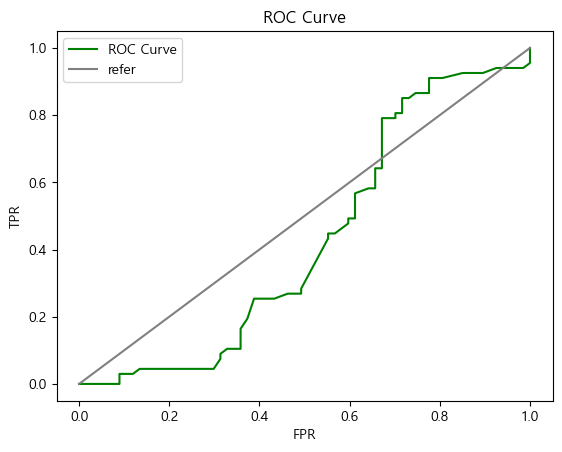

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score,roc_curve
import matplotlib.pyplot as plt
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=0)
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
y_proba = lg.predict_proba(X_test)
print(classification_report(y_test,y_pred))
print('ROC-AUC Score',roc_auc_score(y_test,y_proba[:,1]))
tpr,fpr,thresholds = roc_curve(y_test,y_proba[:,1])
plt.plot(fpr,tpr, c='g',label='ROC Curve');
plt.plot(fpr,fpr,c='grey',label='refer');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# 통계문제

## 5

제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오. (소수점 다섯 째 자리에서 반올림)

In [44]:
from scipy.stats import binom
p = 0.03
n = 25
x = 3 
binom.pmf(x,n,p).round(5)

0.03177

## 6

C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

In [45]:
import math
from scipy.stats import norm
n1 = 1000  # A사 제품 수
x1 = 600   # A사 양품 수
p1 = x1 / n1  # A사 양품률

n2 = 500   # D사 제품 수
x2 = 200   # D사 양품 수
p2 = x2 / n2  # D사 양품률

p = (x1 + x2) / (n1 + n2) # 전체비율
z = (p1 - p2) / math.sqrt(p * (1 - p) * (1/n1 + 1/n2)) # 검정통계량

# 유의수준 0.05에서 가설 검정
alpha = 0.05
p_val = 2 * (1 - norm.cdf(abs(z)))  # 양측 검정

print(f'p_value : {p_val:.5f}')
if p_val < alpha:
    print("두 회사의 양품률에 차이가 있다.")
else:
    print("두 회사의 양품률에 차이가 없다.")

p_value : 0.00000
두 회사의 양품률에 차이가 있다.


- 카이제곱 검정으로 푸는게 더 간단

## 7-1

각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.

데이터 설명 : 아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도 이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv

In [46]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')
df.head()

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693


- 네개의 집단의 범퍼파손정도(연속형 1개 변수)의 차이를 검증하는 것이므로 onewayANOVA를 수행

In [47]:
from scipy.stats import f_oneway
H0 = "네개의 집단의 범퍼파손정도는 차이가 없다"
H1 = "네개의 집단의 범퍼파손정도 간 차이가 있다"
 
stats, p_val = f_oneway(*[df.loc[df['name']==name,'ratio'].values for name in df['name'].unique()])

print(f'검정통계량 : {stats:.3f}')
print(f'P-Value : {p_val:.3f}\n')

if p_val<0.05: print(H1)
else:print(H0)

검정통계량 : 24.977
P-Value : 0.000

네개의 집단의 범퍼파손정도 간 차이가 있다


## 7-2

귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.¶

=== tukeyhsd 사후분석 결과 ===
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


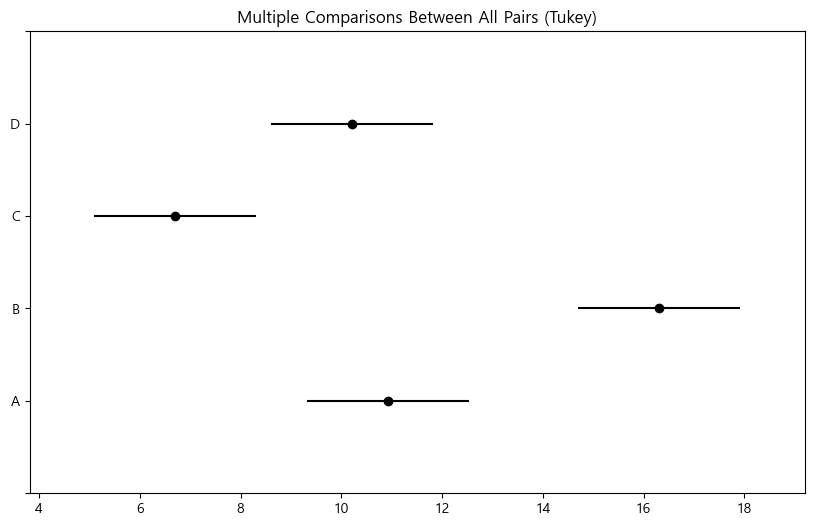

In [48]:
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey_res = pairwise_tukeyhsd(df['ratio'], df['name'], alpha=0.05)
print("=== tukeyhsd 사후분석 결과 ===")
print(tukey_res)
tukey_res.plot_simultaneous()
plt.show()

## 8

L1,L2,L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며 각각 1.1% , 2.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오. (소수점 둘째자리에서 반올림)

In [49]:
l1, l2, l3 = 0.13, 0.37, 0.5 
p1, p2, p3 = 0.011, 0.021, 0.033

In [50]:
import numpy as np
#불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률 
# 불량제품일 확률부터 구함
p_불량제품 = l1*p1+l2*p2+l3*p3
# (L1라인&불량품일 확률) / 불량제품일 확률
np.round(l1*p1 / p_불량제품,4)

0.0556